In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\ml\\Logistic_Regression\\bank-additional-full (1).csv",sep = ";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41199, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [6]:
#lets frist check if there is any null values present 

df.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [7]:
#here as we are having only a small amount of null values present we will be filling it with mean/mode

In [8]:
col = list(df.columns)

In [9]:
for i in col:
    if df[i].dtype == "float64":
        df[i] = df[i].fillna(df[i].mean())
    else:
        df[i] = df[i].fillna(df[i].mode()[0])

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
#Now we have replaced all our null values

In [12]:
#Now in our dependent variable we have yes,no data which we have to replace with 1,0 as Logistic regression
# is a type of statistical analysis used to predict the outcome of a binary (two-class) categorical variable
# based on one or more predictor variables. It is a type of generalized linear model that models the relationship 
# between the dependent variable (the binary outcome) and the independent variables (the predictor variables) using
# a logistic function.

# In logistic regression, the dependent variable is usually represented by a binary
# variable (e.g., 0 or 1, true or false, yes or no). The independent variables can be
# either continuous or categorical. The logistic function is used to transform the linear
# combination of the independent variables into a value between 0 and 1, which can be
# interpreted as the probability of the outcome being in one of the binary categories.

In [13]:
df["y"] = np.where(df["y"] =="yes",1,0)
df["y"] = df["y"].astype(str)

In [14]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

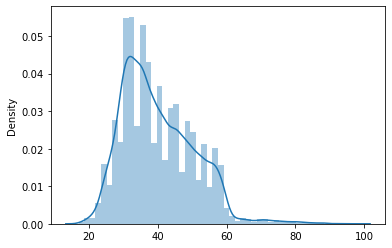

In [15]:
#Lets check if our data is normaly distributed or not 

sns.distplot(x =df["age"])

In [16]:
#so here our data is right skewed Right skewed (also known as positively skewed) refers to the shape 
# of a distribution of data that has a long tail on the right-hand side of the distribution.
# This means that the majority of the data is clustered on the left-hand side, with a smaller 
# proportion of values spread out towards the right-hand side.

# In a right skewed distribution, the mean is typically greater than the median, which is greater than the mode.
# This is because the long tail on the right-hand side pulls the mean to the right,
# while the median is less affected by extreme values and represents the middle value of the data,
# and the mode is the most frequently occurring value.

In [17]:
# So now lets check for outliers

In [18]:
col1 = []
for i in col:
    if df[i].dtype == "float64":
        col1.append(i)

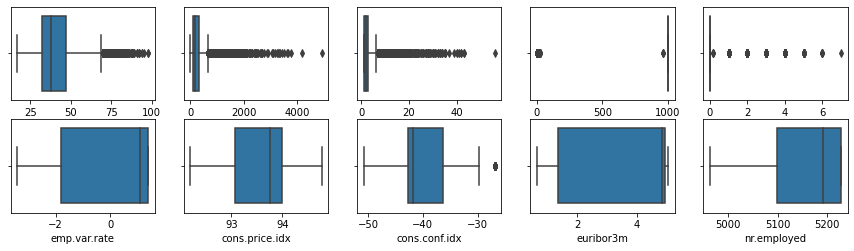

In [19]:
plt.figure(figsize = (15,10))
for p,q in enumerate(col1,start =1):
    plt.subplot(5,5,p)
    sns.boxplot(x = df[q])
    

In [20]:
#so here we can see that the outliers are present so here we wont be removing the outliers 

In [21]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
print(iqr)

age                15.000
duration          217.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64


In [22]:
df = df[~((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).any(axis = 1)]

C:\Users\HP\AppData\Local\Temp\ipykernel_23660\1008107108.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).any(axis = 1)]


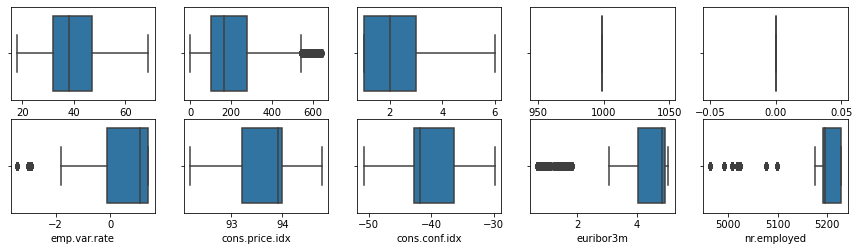

In [23]:
plt.figure(figsize = (15,10))
for p,q in enumerate(col1,start =1):
    plt.subplot(5,5,p)
    sns.boxplot(x = df[q])
    

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

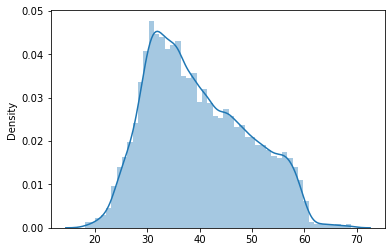

In [24]:
sns.distplot(x =df["age"])

In [25]:
#Now we can see that we have removed most of the outliers

In [26]:
#lets now bin our age column

In [27]:
df["age"].describe()

count    30360.000000
mean        39.671080
std          9.480333
min         18.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         69.000000
Name: age, dtype: float64

In [28]:
df["age"].dtype

dtype('float64')

In [29]:

bins = [0,10,20,30,40,50,60,70]
df["age"] = pd.cut(df["age"],bins)
df["age"] = df["age"].astype(str)

In [30]:
df["age"].value_counts()

(30, 40]    12284
(40, 50]     7855
(20, 30]     5196
(50, 60]     4745
(60, 70]      204
(10, 20]       76
Name: age, dtype: int64

In [31]:
df["age"].dtype

dtype('O')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30360 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30360 non-null  object 
 1   job             30360 non-null  object 
 2   marital         30360 non-null  object 
 3   education       30360 non-null  object 
 4   default         30360 non-null  object 
 5   housing         30360 non-null  object 
 6   loan            30360 non-null  object 
 7   contact         30360 non-null  object 
 8   month           30360 non-null  object 
 9   day_of_week     30360 non-null  object 
 10  duration        30360 non-null  float64
 11  campaign        30360 non-null  float64
 12  pdays           30360 non-null  float64
 13  previous        30360 non-null  float64
 14  poutcome        30360 non-null  object 
 15  emp.var.rate    30360 non-null  float64
 16  cons.price.idx  30360 non-null  float64
 17  cons.conf.idx   30360 non-null 

In [33]:
# lets now visualize our dataset

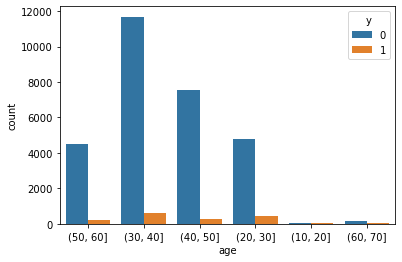

In [34]:
sns.countplot(x = "age",hue = "y",data = df)
plt.show()

In [35]:
# here we can see that people within a age group of 30-40 are having the insurance policy compared to all other age groups
# we can also see that the people within an age group of 10,20 are having the least insurance cover which is obvious as 
# as childrens wont be requiring any insurance plan

In [36]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 60]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(50, 60]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(30, 40]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


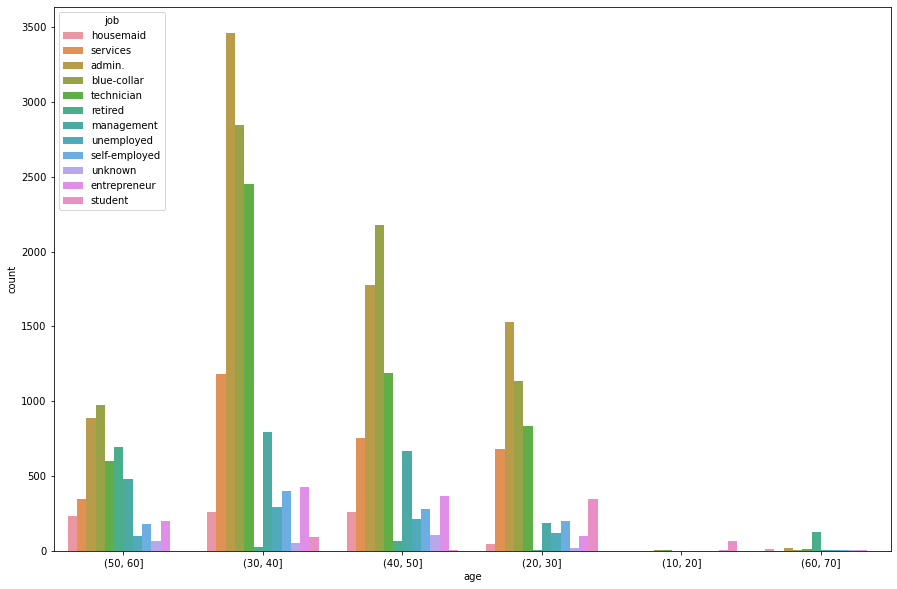

In [37]:
plt.figure(figsize = (15,10))
sns.countplot(x = "age",hue = "job",data = df)
plt.show()

In [38]:
#here we can see that people with an age group of 30-40 are having the highiest job count where we have
#admin, blue-collar and technicians  people are more and as the age rises starting from 50 we can see the rise of 
#retired people 

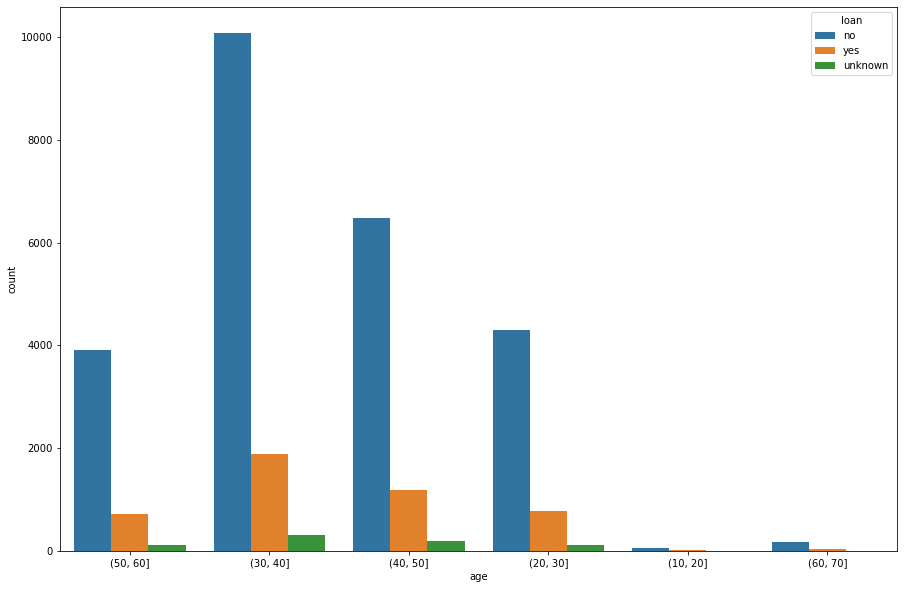

In [39]:
plt.figure(figsize = (15,10))
sns.countplot(x = "age",hue = "loan",data = df)
plt.show()

In [40]:
#when coming to check on the loan data, the age group  betwenn 30- 40 are having the highiest loan rate and the least 
# are for the children and adults the is age group between 10-20, 60-70

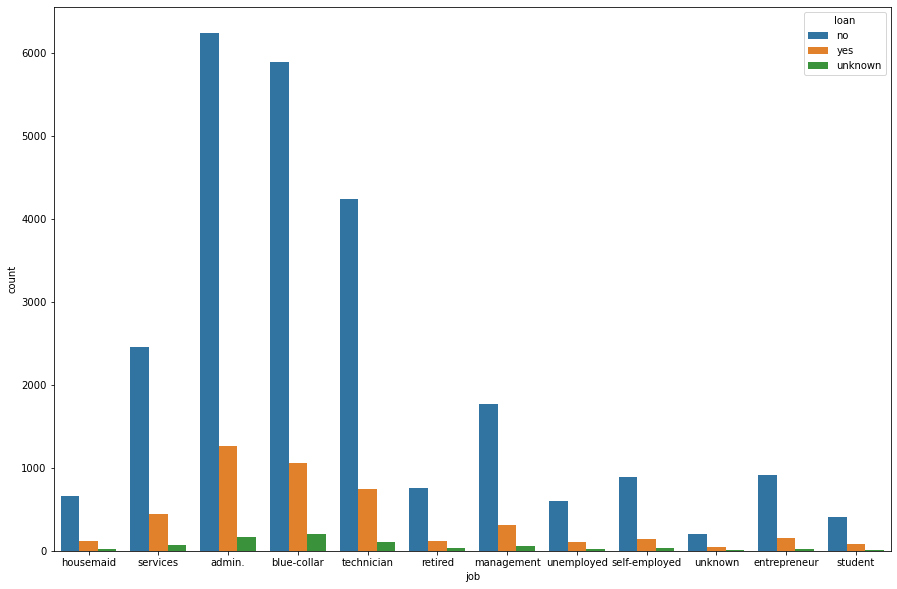

In [41]:
plt.figure(figsize = (15,10))
sns.countplot(x = "job",hue = "loan",data = df)
plt.show()

In [42]:
# we can see that people working as admin and blue-collar happend to be taking more amount of loans and the least 
# amount of loan has been holded by student, retired and housemaid

In [43]:
#lets divide our independent and dependent variables

In [44]:
col = list(df.columns)

In [45]:
col.remove("y")

In [46]:
x = df[col]
y = df["y"]

In [47]:
x.head()#idependent variables

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,"(50, 60]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,"(50, 60]",services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,"(30, 40]",services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,"(30, 40]",admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,"(50, 60]",services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [48]:
y.head()#dependent variable

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: object

In [49]:
#Now lets convert our object dtype to int or float dtypes using label encoding
col2 = list(x.columns)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in (col2):
    if x[i].dtype == "object":
        x[i] = encoder.fit_transform(x[i])

x.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_23660\2245415948.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = encoder.fit_transform(x[i])


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,4,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0
1,4,7,1,3,1,0,0,1,6,1,149.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0
2,2,7,1,3,0,2,0,1,6,1,226.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0
3,2,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0
4,4,7,1,3,0,0,2,1,6,1,307.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0


In [50]:
#Now lets check for multicollinearity

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
col = list(x.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [62]:
col1 = []
for i in (x.columns):
    if x[i].dtype != "object":
        col1.append(i)

In [67]:
x1 = x[col1]

In [70]:
VIF = pd.DataFrame()
VIF["columns"] = col1
VIF["vif"] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
print(VIF)

           columns            vif
0              age       1.211811
1              job       1.025402
2          marital       1.174619
3        education       1.101884
4          default       1.106538
5          housing       1.013146
6             loan       1.003024
7          contact       2.718500
8            month       2.062370
9      day_of_week       1.011244
10        duration       1.011874
11        campaign       1.019619
12           pdays  771327.984195
13        previous            NaN
14        poutcome            NaN
15    emp.var.rate      42.005252
16  cons.price.idx       8.723065
17   cons.conf.idx       3.875911
18       euribor3m      88.907608
19     nr.employed      35.209191


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [72]:
x1 = x1.drop(columns = ["pdays"])
col1.remove("pdays")

In [73]:
VIF = pd.DataFrame()
VIF["columns"] = col1
VIF["vif"] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
print(VIF)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


           columns           vif
0              age      8.628646
1              job      2.095289
2          marital      5.574523
3        education      4.470735
4          default      1.429454
5          housing      2.192728
6             loan      1.208270
7          contact      3.588800
8            month      7.827466
9      day_of_week      3.107408
10        duration      3.172295
11        campaign      3.620896
12        previous           NaN
13        poutcome           NaN
14    emp.var.rate     42.027003
15  cons.price.idx  51276.289533
16   cons.conf.idx    160.553685
17       euribor3m    439.427755
18     nr.employed  58411.101484


In [74]:
x1 = x1.drop(columns = ["nr.employed"])
col1.remove("nr.employed")

In [75]:
VIF = pd.DataFrame()
VIF["columns"] = col1
VIF["vif"] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
print(VIF)

           columns         vif
0              age    8.628407
1              job    2.095249
2          marital    5.573477
3        education    4.470733
4          default    1.428189
5          housing    2.192109
6             loan    1.208169
7          contact    2.748480
8            month    6.761410
9      day_of_week    3.106809
10        duration    3.162960
11        campaign    3.609202
12        previous         NaN
13        poutcome         NaN
14    emp.var.rate   28.441730
15  cons.price.idx  418.366683
16   cons.conf.idx  141.986996
17       euribor3m  203.423006


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [76]:
x1 = x1.drop(columns = ["cons.price.idx"])
col1.remove("cons.price.idx")

In [77]:
VIF = pd.DataFrame()
VIF["columns"] = col1
VIF["vif"] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
print(VIF)

          columns        vif
0             age   8.289911
1             job   2.086696
2         marital   5.406609
3       education   4.388642
4         default   1.426731
5         housing   2.187292
6            loan   1.207535
7         contact   2.506796
8           month   6.440734
9     day_of_week   3.083069
10       duration   3.123972
11       campaign   3.573339
12       previous        NaN
13       poutcome        NaN
14   emp.var.rate  14.824088
15  cons.conf.idx  46.882610
16      euribor3m  85.405963


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [78]:
x1 = x1.drop(columns = ["euribor3m"])
col1.remove("euribor3m")

In [79]:
VIF = pd.DataFrame()
VIF["columns"] = col1
VIF["vif"] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
print(VIF)

          columns        vif
0             age   7.531109
1             job   2.076948
2         marital   5.233209
3       education   4.183011
4         default   1.426632
5         housing   2.177200
6            loan   1.207282
7         contact   2.498633
8           month   5.779963
9     day_of_week   3.034296
10       duration   3.099337
11       campaign   3.566471
12       previous        NaN
13       poutcome        NaN
14   emp.var.rate   1.409452
15  cons.conf.idx  24.502071


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [80]:
x1 = x1.drop(columns = ["cons.conf.idx"])
col1.remove("cons.conf.idx")

In [81]:
VIF = pd.DataFrame()
VIF["columns"] = col1
VIF["vif"] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
print(VIF)

         columns       vif
0            age  5.492449
1            job  2.053774
2        marital  4.136480
3      education  3.911413
4        default  1.421999
5        housing  2.113511
6           loan  1.202492
7        contact  2.483285
8          month  5.128320
9    day_of_week  2.898331
10      duration  2.935638
11      campaign  3.271834
12      previous       NaN
13      poutcome       NaN
14  emp.var.rate  1.405505


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [82]:
#Now we have no multi colliniarity present in our dataset 

In [86]:
x1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate
0,4,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,0,1.1
1,4,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,0,1.1
2,2,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,0,1.1
3,2,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,0,1.1
4,4,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,0,1.1


In [83]:
#splitting the data to train and test set

In [85]:
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.1,random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(27324, 15)
(3036, 15)
(27324,)
(3036,)


In [90]:
#creating the model

In [92]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [93]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [97]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100)

94.40052700922266


In [98]:
#so here we got an accuracy score of 94% 

In [99]:
confusion_matrix(y_test,y_pred)

array([[2843,   33],
       [ 137,   23]], dtype=int64)

In [100]:
# Confusion matrix is a performance evaluation technique used in machine learning and statistics to measure the accuracy and quality of a classification or prediction model. It is a matrix that summarizes the number of correct and incorrect predictions made by the model on a set of data, broken down by class or category.

# A confusion matrix typically consists of four metrics:

# True Positive (TP): the number of instances in which the model correctly predicted the positive class 
#     (e.g., a person who has a disease is correctly diagnosed as positive).

# False Positive (FP): the number of instances in which the model incorrectly predicted the positive class
#     (e.g., a person who does not have a disease is incorrectly diagnosed as positive).

# True Negative (TN): the number of instances in which the model correctly predicted the negative class 
#     (e.g., a person who does not have a disease is correctly diagnosed as negative).

# False Negative (FN): the number of instances in which the model incorrectly predicted the negative class 
#     (e.g., a person who has a disease is incorrectly diagnosed as negative).

# From these metrics, several other metrics can be derived, such as precision, recall, F1 score, 
# and accuracy, which can provide a more nuanced understanding of the model's performance on 
# different classes or categories. Confusion matrices can be visualized as heatmaps or tables, 
# and they are often used in model selection, hyperparameter tuning, and performance monitoring.


# Precision, recall, F1 score, and accuracy are commonly used performance metrics in classification or 
# prediction tasks, such as machine learning or data mining. Here's a brief overview of each metric:

# Precision: Precision is the fraction of true positives (TP) over the sum of true positives and false 
#     positives (FP). In other words, precision measures how many of the instances predicted as positive 
#     by the model are actually positive. High precision indicates low false positive rate.

# Recall: Recall is the fraction of true positives (TP) over the sum of true positives and false negatives 
#     (FN). In other words, recall measures how many of the actual positive instances were correctly predicted 
#     as positive by the model. High recall indicates low false negative rate.

# F1 score: F1 score is the harmonic mean of precision and recall, i.e., 2*(precision * recall) / (precision + recall).
#     F1 score combines the precision and recall metrics into a single measure of performance. High F1 score indicates
#     high accuracy and balance between precision and recall.

# Accuracy: Accuracy is the fraction of correct predictions over the total number of predictions. 
#     In other words, accuracy measures how many of the instances in the test set were correctly 
#     predicted by the model. However, accuracy may not be a good metric for imbalanced datasets, 
#     where one class dominates the others.

# By analyzing precision, recall, F1 score, and accuracy, one can assess the strengths and 
# weaknesses of a classification model and make informed decisions about its suitability for 
# a specific task or domain. It's important to note that different metrics may be more 
# appropriate for different types of problems or applications, and it's often a good idea
# to use multiple metrics to evaluate model performance.



In [101]:
#so according to our confusion matrix we can calculate the below

# Precision = TP / (TP + FP) = 2843 / (2843 + 33) = 0.98
# Recall = TP / (TP + FN) = 2843 / (2843 + 137) = 0.95
# F1 score = 2 * (precision * recall) / (precision + recall) = 2 * (0.98 * 0.95) / (0.98 + 0.95) = 0.65
# Accuracy = (TP + TN) / (TP + TN + FP + FN) = (2843 + 23) / (2843 + 23 + 33 + 137) = 0.9493